In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point, Polygon as ShapelyPolygon
import numpy as np
from scipy.interpolate import splprep, splev
from scipy.spatial import Delaunay
import matplotlib.tri as tri
from numpy import cos, sin, pi

from collections import defaultdict
from IPython.display import display, Math
import sympy as sp

In [2]:
from geometry.cluster import *

In [3]:
# 초기화
# Vertex.reset_index()
# Vertex.reset_instances()
# Edge.reset_index()
# Edge.reset_instances()
# ClusterVariable.reset_index()
# ClusterVariable.reset_instances()
initialize()

# 초기 세팅
n = 8

# 원 위의 n각형
vertices = [
    Vertex(cos(2 * pi * i / n + pi/2), sin(2 * pi * i / n + pi/2)) 
    for i in range(n)
]

frozens = [
    FrozenVariable(vertices[i], vertices[(i + 1) % n], name=chr(ord('a')+i)) 
    for i in range(n)
]

# Triangulation Edges
clusters = [
    ClusterVariable(vertices[1], vertices[3], name="x_1"), 
    ClusterVariable(vertices[0], vertices[3], name="x_2"), 
    ClusterVariable(vertices[0], vertices[4], name="x_3"), 
    ClusterVariable(vertices[0], vertices[5], name="x_4"), 
    ClusterVariable(vertices[5], vertices[7], name="x_5"), 
]

# Laminations
laminations = LaminationList([
    Lamination(3, 5), 
    # Lamination(1, 4),
    # Lamination(1, 3), 
])

q = Quiver(vertices, frozens, clusters, laminations)
# q.flip(1)
# q.flip(2)
# q.flip(3)
# q.flip(4)

# quiver를 생성하고 나서 flip을 진행해도 되고, 처음에 cluster에서 triangulation을 정의해도 됨
# flip하고나면 exchange matrix도 재정의됨
# lamination을 여러개 만들 경우, shear coordinates는 각각이 아니라 한번에 더해서 만들어짐


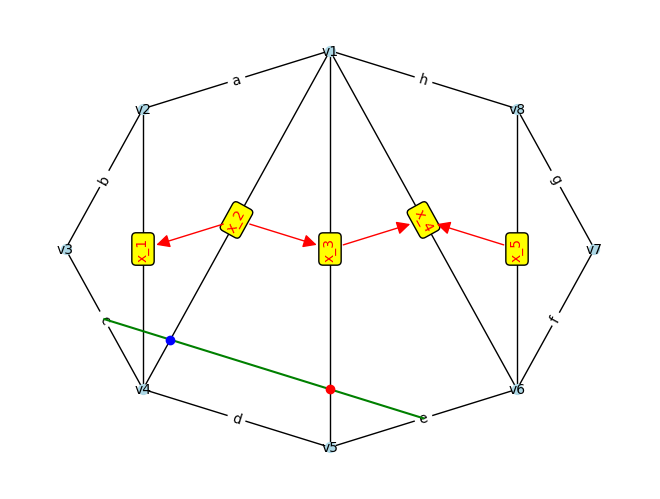

,x_1,x_2,x_3,x_4,x_5
x_1,0,-1,0,0,0
x_2,1,0,1,0,0
x_3,0,-1,0,1,0
x_4,0,0,-1,0,-1
x_5,0,0,0,1,0
Shear,0,1,-1,0,0


In [4]:
q.plot(
    # show_vertex_labels=False, 
    # show_frozen_labels=False, 
    # show_cluster_labels=False, 
    # show_arrows=False,
    # show_shears=False,
)
q.get_exchange_matrix()

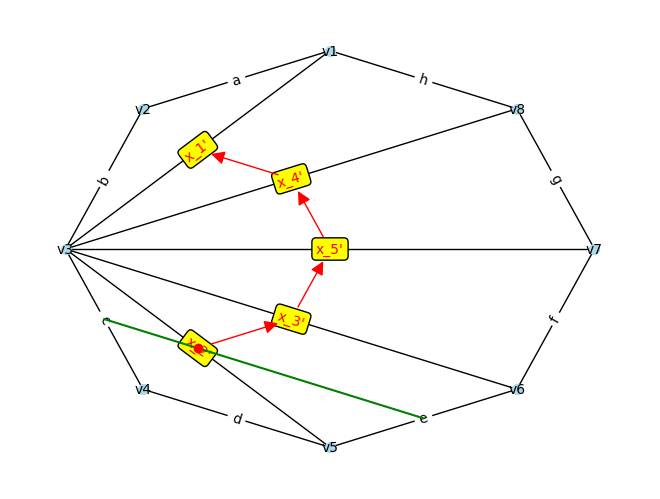

,x_1,x_2,x_3,x_4,x_5
x_1,0,0,0,-1,0
x_2,0,0,1,0,0
x_3,0,-1,0,0,1
x_4,1,0,0,0,-1
x_5,0,0,-1,1,0
Shear,0,-1,0,0,0


In [5]:
q.flip(1)
q.flip(2)
q.flip(3)
q.flip(4)
q.flip(5)
# q.flip(1)
q.plot()
q.get_exchange_matrix()

In [6]:
for r in q.relations:
    display(Math(sp.latex(r)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
for r in q.expressions:
    display(Math(r"\Huge " + sp.latex(r)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# target = sp.symbols("x_2'")
n = len(q.expressions)
for i in range(n):
    for j in range(i+1, n):
        q.expressions[j] = q.expressions[j].subs(q.expressions[i].lhs, q.expressions[i].rhs).simplify()

In [9]:
for expr in q.expressions:
    # Get the common denominator form
    common_denominator_expr = sp.together(expr.rhs)
    
    # Extract the numerator and denominator
    numerator, denominator = sp.fraction(common_denominator_expr)
    
    # Expand only the denominator
    expand_numerator = sp.expand(numerator)
    
    # Combine the expanded denominator with the numerator
    result = expand_numerator / denominator
    
    eqn = sp.Eq(expr.lhs, result)
    
    display(Math(r"\huge " + sp.latex(eqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>